In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('exoplanets.csv')
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


How many exoplanets are missing values for all 3 planet characteristics at once (mass, orbital
period, and distance)?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
len(df[(df['orbital_period'].isnull() & df['mass'].isnull() & df['distance'].isnull())])

# There are 11 planet entries that have their orbital period, 
# mass, and distance all missing at the same time

11

Were there any years between 1989 and 2014 where no exoplanets were discovered? 

In [19]:
no_exoplanets_years = set(df['year'].unique())
list_of_years = set(range(1989, 2015))

list_of_years.difference(no_exoplanets_years)

# According to the dataframe, there were no planets that were discovered
# in the years 1990, 1991, and 1993

{1990, 1991, 1993}

Out of the 3 most common discovery methods, which appears to be the most capable of finding
faraway exoplanets?

In [7]:
df['method'].value_counts()

# here I can see that Radial Velocity, Transit, and 
# Imaging are the three most common discovery methods

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [8]:
most_common_methods_df = df[(df['method'] == 'Radial Velocity') | (df['method'] == 'Transit') 
   | (df['method'] == 'Radial Velocity')]

most_common_methods_df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [9]:
df.distance.describe()

# I see that the 75th percentile lies at 178.5 units of distance. So I'll consider that my cutoff

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [10]:
methods_above_75th_series = most_common_methods_df[df['distance'] > 178.5]['method']
methods_above_75th_series

# so here is a series object comprised of all the exoplanets that are beyond 178.5 units of distance

/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_26881/2080423130.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  methods_above_75th_series = most_common_methods_df[df['distance'] > 178.5]['method']


92      Transit
93      Transit
99      Transit
100     Transit
101     Transit
         ...   
1024    Transit
1026    Transit
1028    Transit
1033    Transit
1034    Transit
Name: method, Length: 184, dtype: object

<AxesSubplot:>

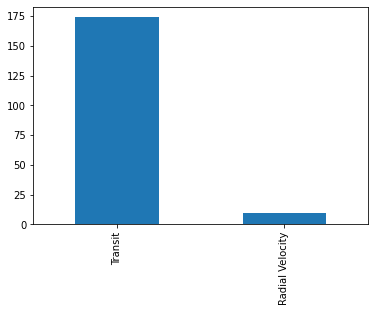

In [11]:
methods_above_75th_series.value_counts().plot.bar()

# And as you can see, the 'Transit' method of discovery 
# is most common with finding exoplanets that are far away

How far away is the closest exoplanet whose mass is unknown?

In [12]:
df[df['mass'].isna()]['distance'].min()

7.69

How far away is the furthest exoplanet whose mass is known?

In [13]:
df[df['mass'].notna()]['distance'].max()

354.0

How far away is the exoplanet with the longest orbital period?

In [14]:
df.loc[df['orbital_period'].idxmax()]

# it's not even known how far away it is

method             Imaging
number                   1
orbital_period    730000.0
mass                   NaN
distance               NaN
year                  2006
Name: 937, dtype: object

What is the shortest orbital period of the exoplanets with no known mass?

In [15]:
df[df['mass'].isna()]['orbital_period'].min()

0.09070629

What is the average distance of exoplanets whose mass is known? What is the average distance
of exoplanets whose mass is unknown? 

In [16]:
df[df['mass'].notna()]['distance'].mean(), df[df['mass'].isna()]['distance'].mean()

# It looks like the average distance for planets that have their mass known is significantly less 
# than the average distance for planets that have unknown mass
# I can infer that the farther a planet is, the harder it is to gauge its mass, or study in general
# compared to the planets that have their mass known, it's way easier to guage their mass since they're easier to study

(52.068212851405626, 604.638741935484)

Which exoplanet discovery method is responsible for the most missing mass values? Why or why
not? 

<AxesSubplot:>

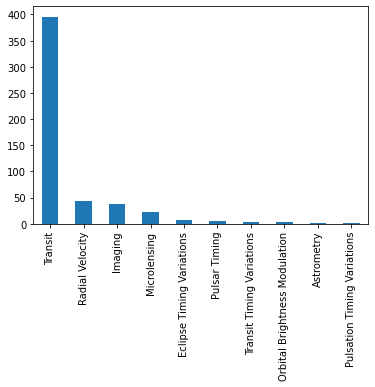

In [17]:
df[df['mass'].isna()]['method'].value_counts().plot.bar()

# looks like the transit method is responsible for the most missing mass values. 
# I do think that this method is unsuitable for determining the mass of exoplanets.
# This could be because this method is designed specifically to only find planets that are 
# unusually far. There could be a different method entirely dedicated towards finding out
# the mass of the planets from Transit

Citing from [this NASA article that details how Transit works](https://exoplanets.nasa.gov/faq/31/whats-a-transit/).

It seems like the practice of using Transit is a method that involves not the direct line of sight with the planet itself, but the shadow generated by the star it is passing in front of. Therefore, I imagine it would be next to impossible to find the mass of a planet using a mere shadow. 